In [6]:
# -*- coding: utf-8 -*-
"""
Created on Thu Sep 22 11:00:17 2022
@author: David
"""

#######################################################################

#Import all of the wonderful things we like and need to manage data and make plots.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pds
import pathlib 
import math
import cmath
from scipy import stats
from scipy.constants import k
from copy import deepcopy

from Google_helper import getGoogleTimeDistance


In [7]:
"""
Housekeeping to add and prep files
"""

# Read input addresses
inAddresses = pds.read_csv("addresses.csv")
address_list = inAddresses['addresses'].values

# Calculate time and distance matrices
time_matrix, distance_matrix = getGoogleTimeDistance(address_list, 'your_api_key_here')


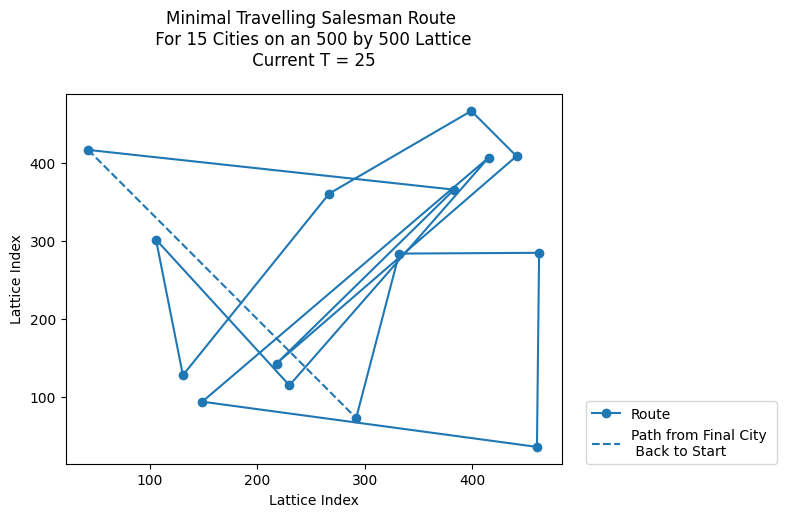

24.5
24.0
23.5
23.0
22.5
22.0
21.5
21.0
20.5
20.0


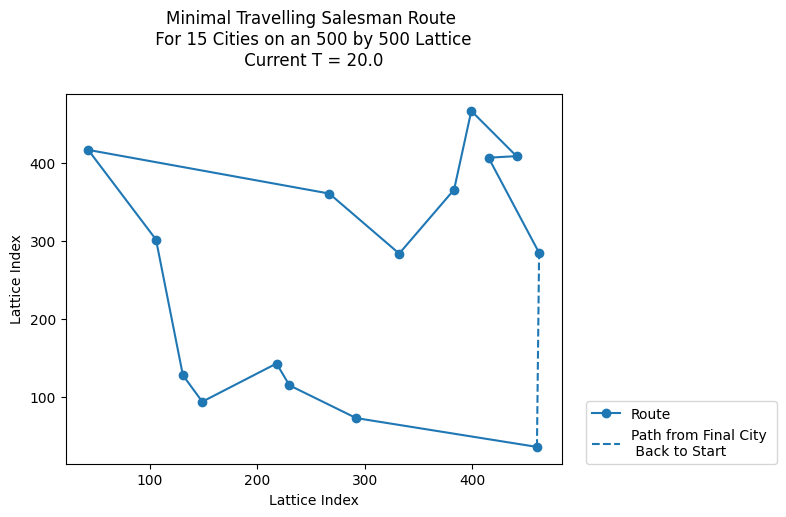

19.5
19.0
18.5
18.0
17.5
17.0
16.5
16.0
15.5
15.0


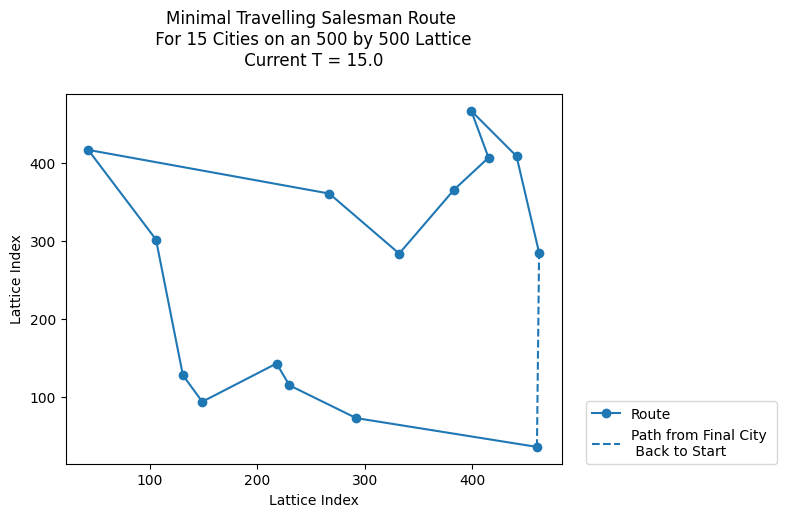

14.5
14.0
13.5
13.0
12.5
12.0
11.5
11.0
10.5
10.0


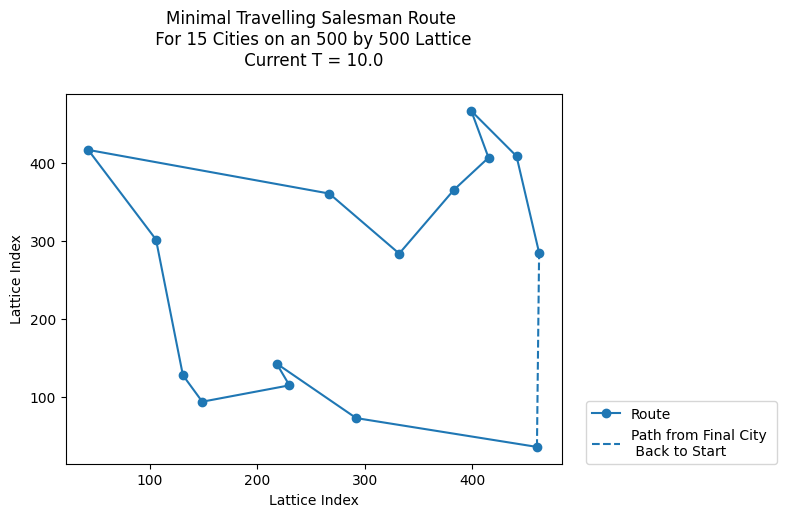

9.5
9.0
8.5
8.0
7.5
7.0
6.5
6.0
5.5
5.0


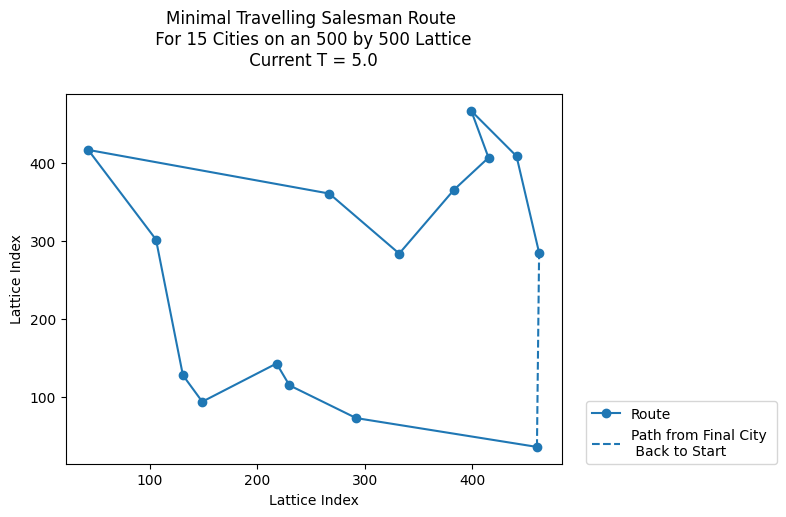

4.5
4.0
3.5
3.0
2.5


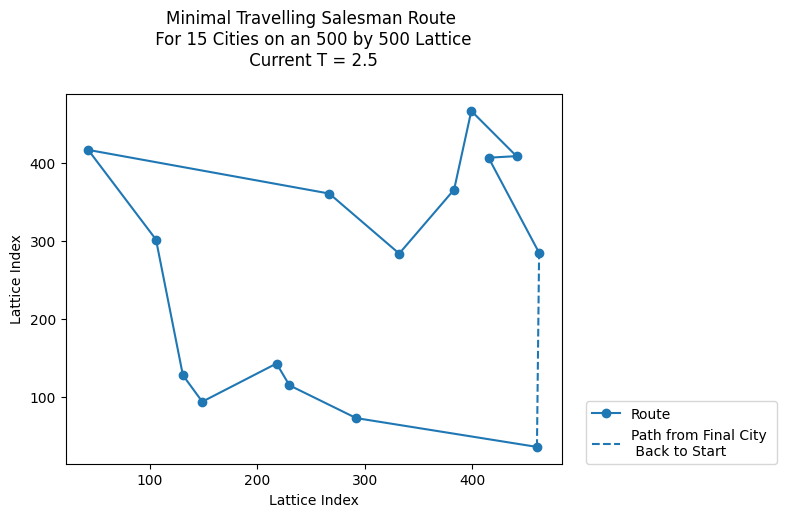

Final Route Length: 1715.309482806241


In [1]:
#######################################################################

# We make an array corresponding to the appropriate index in the cost and distance matrices.
def generate_cities(N):
    
    #Initialize array.
    cities = []
    
    #For the number of cities we want N:
    for i in range(0, N):
        #Generate x and y coordinates.
            cities.append(i)
    return cities

#Define a function to calculate the route length:
def calc_route_length(config):
    
    route_length = 0
    
    #For each city, calculate the distance between it and previous. Done by finding the appropriate entry in the distance matrix
    for i in range(len(config)):
        #d = np.sqrt((config[i][0] - config[i-1][0])**2 + (config[i][1] - config[i-1][1])**2)
        route_length = route_length + distance_matrix[i-1][i]
        
    return route_length



#Define a function to generate a trial configuration where we swap the order of visiting two cities.
def generate_trial_config(config):
    
    #Make a deep copy so we don't accidentally mess up our config:
    trial_config = deepcopy(config)
    
    #Generate one random city to switch:
    first_swap = np.random.randint(0, len(config))
    #Assign this value to our second swap:
    second_swap = first_swap
    
    #Generate a second random city to switch, making sure it's different from our first:
    while second_swap == first_swap:
        second_swap = np.random.randint(0, len(config))
    
    #Now swap our indices:
    hold_value = deepcopy(trial_config[first_swap])
    trial_config[first_swap] = trial_config[second_swap]
    trial_config[second_swap] = hold_value
    
    #print(trial_config)
    
    return trial_config, first_swap, second_swap

#Define a function to calculate the change in distance from our configuration change:
def calc_distance_change(config, trial_config, first_swap, second_swap):
    
    #Calculate original distance:
    original = config[first_swap]
    #x_i = config[first_swap][0]
    #y_i = config[first_swap][1]
    #Distance between first swap -1:
    #x_1_min = config[first_swap-1][0]
    #y_1_min = config[first_swap-1][1]
    original_min = config[first_swap-1]
    #Pythagorean theorem:
    d_one_min = distance_matrix[original_min][original]
    #d_one_min = np.sqrt((x_i - x_1_min)**2 + (y_i - y_1_min)**2)
    #Distance between first swap +1, set our bounds on our array of values:
    if (first_swap + 1) > (len(config)-1):
        swap_max = 0
    else:
        swap_max = first_swap +1
    #x_1_max = config[swap_max][0]
    #y_1_max = config[swap_max][1]
    original_max = config[swap_max]
    #Pythagoran theorem:
    d_one_max = distance_matrix[original][original_max]
    #d_one_max = np.sqrt((x_1_max - x_i)**2 + (y_1_max - y_i)**2)
    #Distance between second swap -1:
    #x_j = config[second_swap][0]
    #y_j = config[second_swap][1]
    original2 = config[second_swap]
    original2_min = config[second_swap-1]
    #x_2_min = config[second_swap-1][0]
    #y_2_min = config[second_swap-1][1]
    #Pythagorean theorem:
    #d_two_min = np.sqrt((x_j - x_2_min)**2 + (y_j - y_2_min)**2)
    d_two_min = distance_matrix[original2_min][original2]
    #Distance between second swap +1, set our bounds on array of values:
    if (second_swap + 1) > (len(config)-1):
        swap_max = 0
    else:
        swap_max = second_swap +1
    #x_2_max = config[swap_max][0]
    #y_2_max = config[swap_max][1]
    original2_max = config[swap_max]
    #Pythagorean theorem:
    #d_two_max = np.sqrt((x_2_max - x_j)**2 + (y_2_max - y_j)**2)
    d_two_max = distance_matrix[original2][original2_max]
    #Now we have our original distance that navigating to these points took:
    original_distance = d_one_min + d_one_max + d_two_min + d_two_max
    #print(original_distance)
    
    """
    Now repeat for the trial configuration...
    """

    #Calculate original distance:
    #x_i = trial_config[first_swap][0]
    #y_i = trial_config[first_swap][1]
    originalt = trial_config[first_swap]
    #Distance between first swap -1:
    #x_1_min = trial_config[first_swap-1][0]
    #y_1_min = trial_config[first_swap-1][1]
    originalt_min = trial_config[first_swap-1]
    #Pythagorean theorem:
    #d_one_min = np.sqrt((x_i - x_1_min)**2 + (y_i - y_1_min)**2)
    d_one_min = distance_matrix[originalt_min][originalt]
    #Distance between first swap +1, set our bounds on our array of values:
    if (first_swap + 1) > (len(trial_config)-1):
        swap_max = 0
    else:
        swap_max = first_swap +1
    #x_1_max = trial_config[swap_max][0]
    #y_1_max = trial_config[swap_max][1]
    originalt_max = trial_config[swap_max]
    #Pythagoran theorem:
    #d_one_max = np.sqrt((x_1_max - x_i)**2 + (y_1_max - y_i)**2)
    d_one_max = distance_matrix[originalt][originalt_max]
    #Distance between second swap -1:
    #x_j = trial_config[second_swap][0]
    #y_j = trial_config[second_swap][1]
    originalt2 = trial_config[second_swap]
    #x_2_min = trial_config[second_swap-1][0]
    #y_2_min = trial_config[second_swap-1][1]
    originalt2_min = trial_config[second_swap-1]
    #Pythagorean theorem:
    #d_two_min = np.sqrt((x_j - x_2_min)**2 + (y_j - y_2_min)**2)
    d_two_min = distance_matrix[originalt2_min][originalt2]
    #Distance between second swap +1, set our bounds on array of values:
    if (second_swap + 1) > (len(config)-1):
        swap_max = 0
    else:
        swap_max = second_swap +1
    #x_2_max = trial_config[swap_max][0]
    #y_2_max = trial_config[swap_max][1]
    originalt2_max = trial_config[swap_max]
    #Pythagorean theorem:
    #d_two_max = np.sqrt((x_2_max - x_j)**2 + (y_2_max - y_j)**2)
    d_two_max = distance_matrix = [originalt2][originalt2_max]
    
    #Now we have our new distance that navigating to these points took:
    new_distance = d_one_min + d_one_max + d_two_min + d_two_max
    #print(new_distance)
    
    #Calculate our change in distance:
    delta_d = new_distance - original_distance
    #print(delta_d)
    
    return delta_d

#Define a function to calculate our probability and evaluate it:
def evaluate_route_change(delta_d, T):
    
    #Calculate our probability:
    P = math.exp((-1*delta_d)/(T))
    #Geneate uniform random variable:
    u = np.random.uniform()
    #Estimate whether we're keeping this or not:
    if u <= P:
        accept = True
    else:
        accept = False
    
    return accept
    
#Define a function to minimize our route:
def minimize_route(config, T, roc_tol, mean_samples):
    
    #Create counter for our number of steps, and initial large value for rate of change:
    numsteps = 0
    roc = 10*roc_tol
    
    #Find our initial route length - we'll need this later...
    route_length = calc_route_length(config)
    #Create array to store new route lengths:
    route_lengths = []
    
    #Want rate of change of our config over some number of steps to be small...
    while roc > roc_tol:
        
        #Generate trial configuration and calulate change in distance:
        trial_config, first_swap, second_swap = generate_trial_config(config)
        delta_d = calc_distance_change(config, trial_config, first_swap, second_swap)
        
        #Evaluate if we are keeping our new configuration or not...
        if delta_d <= 0:
            config = deepcopy(trial_config)
            route_length = route_length + delta_d
            route_lengths.append(route_length)
            #Increment numsteps counter:
            numsteps = numsteps +1
        else:
            accept = evaluate_route_change(delta_d, T)
            if accept == True:
                config = deepcopy(trial_config)
                route_length = route_length + delta_d
                route_lengths.append(route_length)
                #Increment numsteps counter:
                numsteps = numsteps +1
            else: 
                pass
        
        #If we have more than 100 steps, evaluate our mean route length over the last 50 steps,
        #compare to the 50 before, and see what our rate of change is.
        if numsteps > (mean_samples*2):
            new_mean = np.mean(route_lengths[numsteps-mean_samples:])
            old_mean = np.mean(route_lengths[numsteps-(mean_samples*2):numsteps-mean_samples])
            roc = abs(new_mean - old_mean)
            
    return config, route_lengths

#Define a function to compute our smallest route overall:
def travelling_salesman(N, M, initial_T, delta_T, roc_tol_at_T, roc_tol, mean_samples, failsafe):
    
    #Generate initial configuration:
    initial_config = generate_cities(N, M)
    
    #Create equivalent of do-while loop:
    while True:
        #Do some math with our original route, including calculating route lengths etc.
        config = initial_config
        old_route_length = calc_route_length(config)
        old_route_lengths = []
        old_route_lengths.append(old_route_length)
        #Create set of unique routes.
        unique_routes = set(np.around(old_route_lengths,3))
        #Set an initial roc we can evaluate against.
        roc = 10*roc_tol
        #Set our initial T.
        T = initial_T
        #Plot our initial configuration:
        x_coords = []
        y_coords = []
                
        for i in range(len(config)):
            x_coords.append(config[i][0])
            y_coords.append(config[i][1])
            
                
        final_plot_xs = []
        final_plot_xs.append(x_coords[0])
        final_plot_xs.append(x_coords[-1])
        final_plot_ys = []
        final_plot_ys.append(y_coords[0])
        final_plot_ys.append(y_coords[-1])
                    
        #Now we plot!
        plt.plot(x_coords, y_coords, marker ='o', color = 'tab:blue', linestyle = 'solid', label = 'Route')
        plt.plot(final_plot_xs, final_plot_ys, color = 'tab:blue', linestyle = '--', label = 'Path from Final City \n Back to Start')
        plt.xlabel('Lattice Index')
        plt.ylabel('Lattice Index')
        plt.title('Minimal Travelling Salesman Route \n For ' + str(N) + ' Cities on an ' + str(M) + ' by ' + str(M) + ' Lattice \n Current T = ' + str(T) + ' \n')
        plt.legend(loc=(1.05, 0), markerscale=1)
        plt.show()
        
        #Run while our roc is greater than our tol, and our temperature is above 0:
        while (roc > roc_tol) and (T > 0):
            #Minimize route at current T:
            config, route_lengths = minimize_route(config, T, roc_tol_at_T, mean_samples)
            #If we've come up with a shorter route:
            if len(route_lengths) != 0:
                #Calculate change in mean:
                old_mean = np.mean(old_route_lengths)
                new_mean = np.mean(route_lengths)
                roc = abs(new_mean - old_mean)
                #If our roc is still greater:
                if roc > roc_tol:
                    #Swap over and update our recent routes...
                    old_route_lengths = deepcopy(route_lengths)
                    temp_set_routes = set(np.around(old_route_lengths,3))
                    unique_routes = unique_routes.union(temp_set_routes)
                else:
                    pass
            else:
                pass
            
            #Now we show some plots at various T so we can show our evolution...
            if T in [20, 15, 10, 5]:
                x_coords = []
                y_coords = []
                
                for i in range(len(config)):
                    x_coords.append(config[i][0])
                    y_coords.append(config[i][1])
            
                
                final_plot_xs = []
                final_plot_xs.append(x_coords[0])
                final_plot_xs.append(x_coords[-1])
                final_plot_ys = []
                final_plot_ys.append(y_coords[0])
                final_plot_ys.append(y_coords[-1])
                    
                #Now we plot!
                plt.plot(x_coords, y_coords, marker ='o', color = 'tab:blue', linestyle = 'solid', label = 'Route')
                plt.plot(final_plot_xs, final_plot_ys, color = 'tab:blue', linestyle = '--', label = 'Path from Final City \n Back to Start')
                plt.xlabel('Lattice Index')
                plt.ylabel('Lattice Index')
                plt.title('Minimal Travelling Salesman Route \n For ' + str(N) + ' Cities on an ' + str(M) + ' by ' + str(M) + ' Lattice \n Current T = ' + str(T) + ' \n')
                plt.legend(loc=(1.05, 0), markerscale=1)
                plt.show()
            else: 
                pass
            
            #Increment T downwards...
            T = T - delta_T
            print(T)
            
            #If T goes below zero...
            if T <= 0:
                route_lengths.append(old_route_lengths[-1])
            else:
                pass
        
        #Sort our set of routes so we can use these in failsafe.
        sorted_routes = sorted(unique_routes)
        #print(sorted_routes)
            
        #If we're not using the failsafe, or if our route is as short as the shortest possible route after hitting roc tolerance, break the loop.
        if (failsafe == False) or (round(route_lengths[-1],3) <= (round(sorted_routes[0],3)+0.001)):
            break
    
    #Now we plot our final route...
    x_coords = []
    y_coords = []
    
    for i in range(len(config)):
        x_coords.append(config[i][0])
        y_coords.append(config[i][1])

    
    final_plot_xs = []
    final_plot_xs.append(x_coords[0])
    final_plot_xs.append(x_coords[-1])
    final_plot_ys = []
    final_plot_ys.append(y_coords[0])
    final_plot_ys.append(y_coords[-1])
        
    #Now we plot!
    plt.plot(x_coords, y_coords, marker ='o', color = 'tab:blue', linestyle = 'solid', label = 'Route')
    plt.plot(final_plot_xs, final_plot_ys, color = 'tab:blue', linestyle = '--', label = 'Path from Final City \n Back to Start')
    plt.xlabel('Lattice Index')
    plt.ylabel('Lattice Index')
    plt.title('Minimal Travelling Salesman Route \n For ' + str(N) + ' Cities on an ' + str(M) + ' by ' + str(M) + ' Lattice \n Current T = ' + str(T) + ' \n')
    plt.legend(loc=(1.05, 0), markerscale=1)
    plt.show()

    return config, unique_routes, route_lengths[-1]

#######################################################################
#Main: let's run some functions:

#config, unique_routes, final_route_length = travelling_salesman(6, 10, 20, 0.05, 0.001, 0.001, 100, True)
#print('Set of Unique Route Lengths: ' + str(unique_routes))
#print('Final Route Length: ' + str(final_route_length))

config, unique_routes, final_route_length = travelling_salesman(15, 500, 25, 0.5, 0.1, 0.1, 100, False)
print('Final Route Length: ' + str(final_route_length))

In [56]:
def generate_speed_limits(N_cities):
    """
    inputs: int N_cities
    outputs: dict[dict[float]]: result_dic
    caclulate the speed to go from city i to city j
    """
    speed_limits = [40,50,60,70,80,90,100]
    result_dict = {}
    
    for i in range(N_cities):
        result_dict[i] = {}
        for j in range(N_cities):
            if i !=j:
                speed_limit_type = random.randint(0, len(speed_limits)-1)
                result_dict[i][j] = speed_limits[speed_limit_type]
            else:
                result_dict[i][j] = 0
        
    return(result_dict)

def get_speed_limit(start_idx, end_idx, speed_limit_dict):
    """
    inputs: int start_idx, int end_idx, dict speed_limit_dict
    outputs: float speed_limit
    """
    result = speed_limit_dict[start_idx][end_idx]
    return result

In [64]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from geopy.geocoders import Nominatim
import random

In [68]:
def coords_from_address(address):
    geolocator = Nominatim(user_agent = "test")
    location = geolocator.geocode(address)
    return(location.latitude, location.longitude)


In [69]:
addr = "266 Lorry Greenberg Drive"
coords_from_address(addr)

(45.364701999999994, -75.63091190873016)

In [2]:
#assume same city, one depot
#inputs 
#csv file list of addresses
#1 supply depo
#outputs

address_list = ["75 Laurier Ave. E, Ottawa, Ontario, Canada","14 Waller St, Ottawa, Ontario, Canada","363 Rideau St, Ottawa, Ontario, Canada","52 Range Rd, Ottawa, Ontario, Canada","250 Somerset St. E, Ottawa, Ontario, Canada"]

outFrame = pds.DataFrame(data = address_list, columns=["addresses"])

outFrame.to_csv("addresses.csv", index=False)